In [1]:
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Feature: different_Alpha1 – Burn Severity Confusion Matrix

Confusion Matrix (%):
Class 0:   9.44%   59.46%   15.34%   15.76%
Class 1:   4.10%   83.37%    5.48%    7.05%
Class 2:  11.51%   31.80%   32.61%   24.09%
Class 3:  12.37%   16.63%   33.71%   37.28%


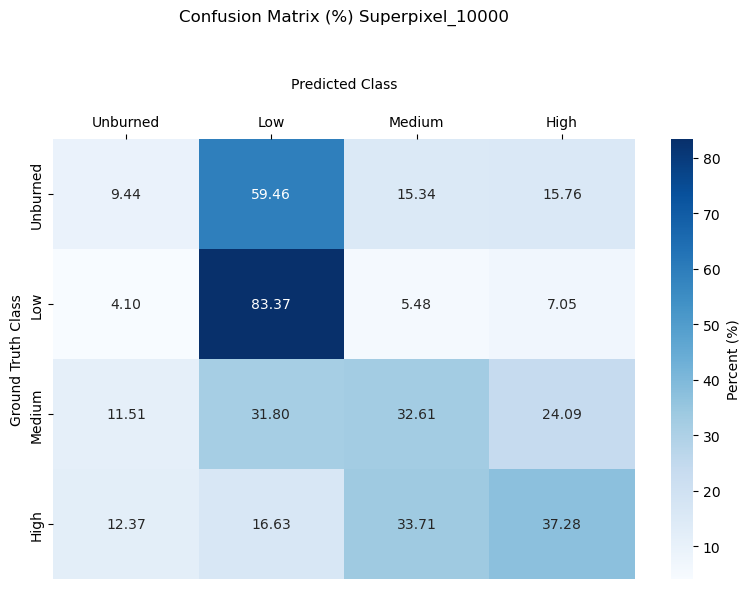


Overall Accuracy: 69.88%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.14      0.09      0.11     30436
         Low       0.87      0.83      0.85    285740
      Medium       0.39      0.33      0.36     46049
        High       0.09      0.37      0.14      9109

    accuracy                           0.70    371334
   macro avg       0.37      0.41      0.37    371334
weighted avg       0.73      0.70      0.71    371334



In [2]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_superpixel_10000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:   9.90%   61.96%   14.11%   14.03%
Class 1:   3.60%   83.20%    5.84%    7.36%
Class 2:  10.06%   33.70%   35.20%   21.04%
Class 3:   5.58%   25.38%   40.59%   28.46%


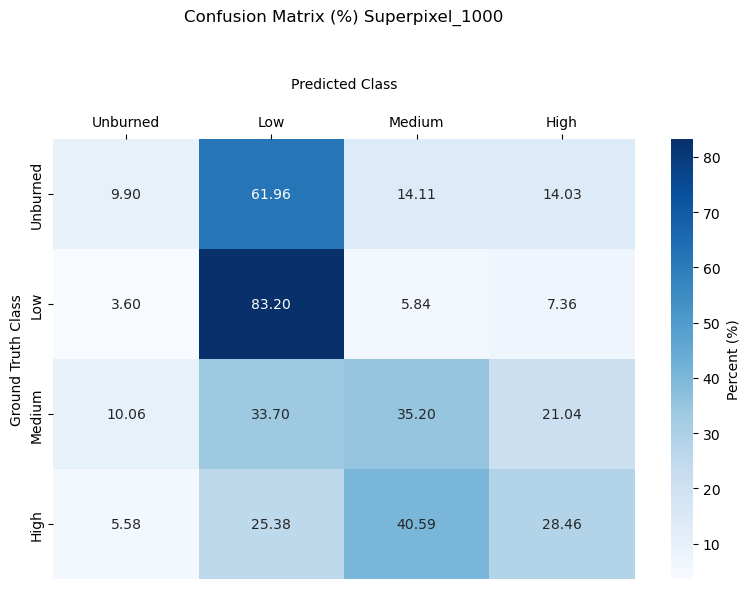


Overall Accuracy: 69.90%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.16      0.10      0.12     30436
         Low       0.87      0.83      0.85    285740
      Medium       0.40      0.35      0.37     46049
        High       0.07      0.28      0.11      9109

    accuracy                           0.70    371334
   macro avg       0.37      0.39      0.36    371334
weighted avg       0.73      0.70      0.71    371334



In [3]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_superpixel_1000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_1000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:   9.04%   66.52%   11.57%   12.87%
Class 1:   2.93%   86.01%    5.00%    6.05%
Class 2:  10.61%   37.81%   30.33%   21.25%
Class 3:   7.72%   27.94%   33.31%   31.04%


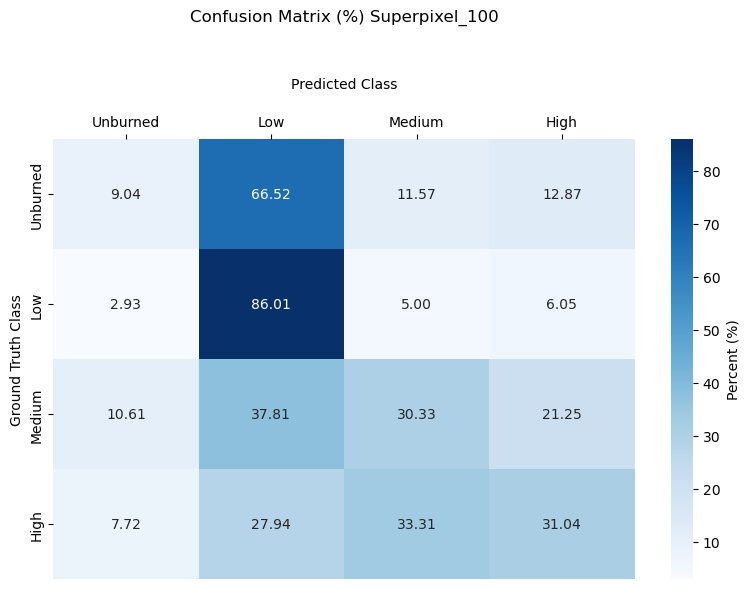


Overall Accuracy: 71.45%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.16      0.09      0.12     30436
         Low       0.86      0.86      0.86    285740
      Medium       0.40      0.30      0.35     46049
        High       0.08      0.31      0.13      9109

    accuracy                           0.71    371334
   macro avg       0.38      0.39      0.36    371334
weighted avg       0.73      0.71      0.72    371334



In [4]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_superpixel_100.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_100", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:   7.38%   68.58%   10.11%   13.94%
Class 1:   2.45%   87.08%    4.50%    5.97%
Class 2:   8.22%   41.72%   26.47%   23.60%
Class 3:   5.73%   32.28%   30.48%   31.52%


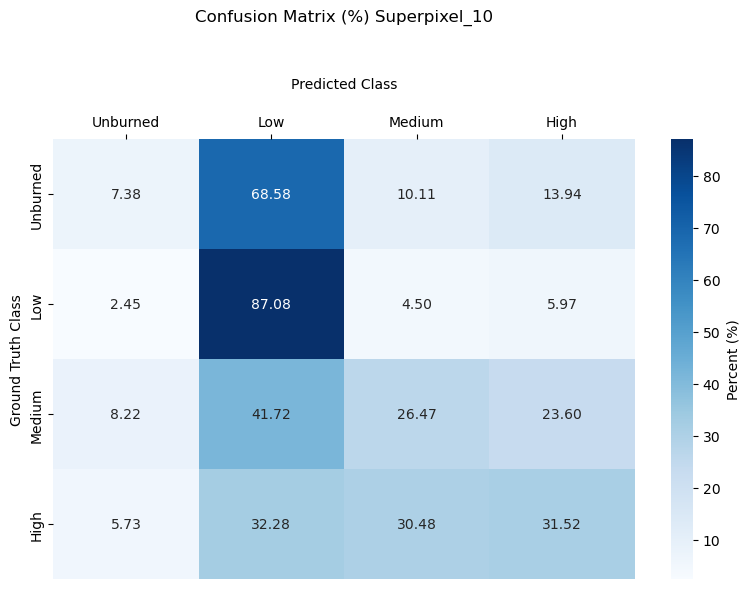


Overall Accuracy: 71.67%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.17      0.07      0.10     30436
         Low       0.85      0.87      0.86    285740
      Medium       0.39      0.26      0.32     46049
        High       0.08      0.32      0.13      9109

    accuracy                           0.72    371334
   macro avg       0.37      0.38      0.35    371334
weighted avg       0.72      0.72      0.71    371334



In [5]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_superpixel_10.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:   5.61%   48.51%   26.13%   19.75%
Class 1:   2.08%   77.51%   12.02%    8.39%
Class 2:   5.87%   25.48%   52.34%   16.31%
Class 3:   3.29%   11.26%   63.71%   21.74%


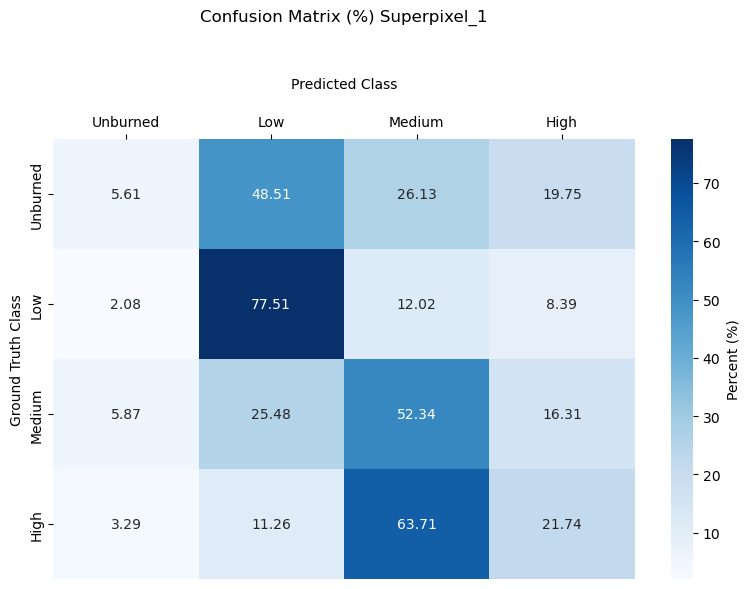


Overall Accuracy: 67.13%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.16      0.06      0.08     30436
         Low       0.89      0.78      0.83    285740
      Medium       0.33      0.52      0.41     46049
        High       0.05      0.22      0.08      9109

    accuracy                           0.67    371334
   macro avg       0.36      0.39      0.35    371334
weighted avg       0.74      0.67      0.70    371334



In [6]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_superpixel_1.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_1", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Feature: median_pre_alpha1_median_post_alpha1 Burn Severity Confusion Matrix

Confusion Matrix (%):
Class 0:  16.27%   55.66%   15.05%   13.01%
Class 1:   5.17%   82.57%    6.63%    5.64%
Class 2:  18.36%   25.53%   26.02%   30.09%
Class 3:  15.16%   14.45%   29.40%   40.99%


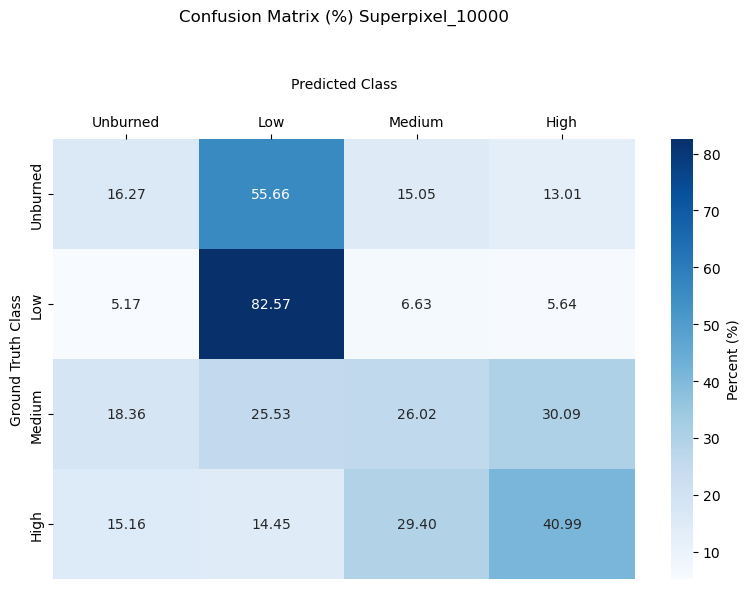


Overall Accuracy: 69.10%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.17      0.16      0.17     30436
         Low       0.89      0.83      0.86    285740
      Medium       0.31      0.26      0.28     46049
        High       0.10      0.41      0.16      9109

    accuracy                           0.69    371334
   macro avg       0.37      0.41      0.37    371334
weighted avg       0.74      0.69      0.71    371334



In [7]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_superpixel_10000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  17.73%   51.67%   20.80%    9.80%
Class 1:   6.55%   79.37%    8.58%    5.50%
Class 2:  20.50%   24.73%   42.91%   11.87%
Class 3:  20.17%   10.56%   56.53%   12.75%


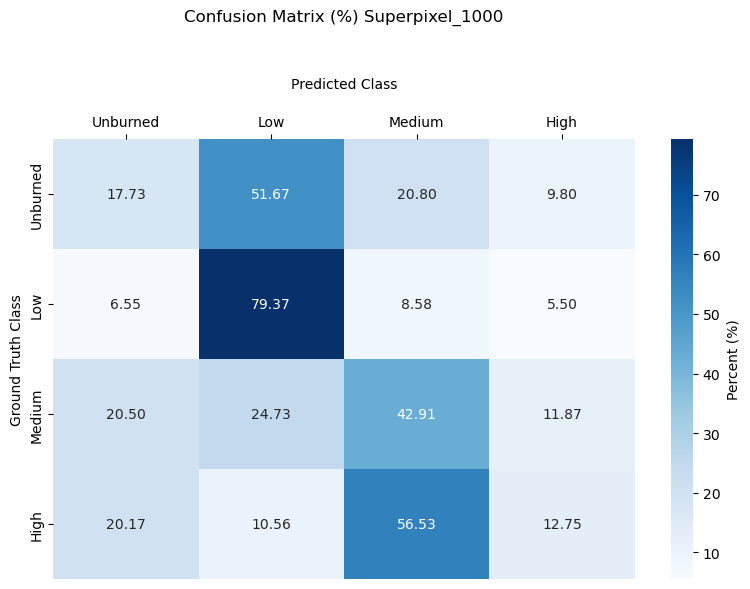


Overall Accuracy: 68.16%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.15      0.18      0.16     30436
         Low       0.89      0.79      0.84    285740
      Medium       0.35      0.43      0.39     46049
        High       0.05      0.13      0.07      9109

    accuracy                           0.68    371334
   macro avg       0.36      0.38      0.36    371334
weighted avg       0.74      0.68      0.71    371334



In [8]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_superpixel_1000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_1000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  14.73%   55.50%   17.29%   12.48%
Class 1:   5.22%   81.06%    7.34%    6.37%
Class 2:  14.88%   32.29%   38.92%   13.92%
Class 3:  14.91%   20.35%   49.05%   15.69%


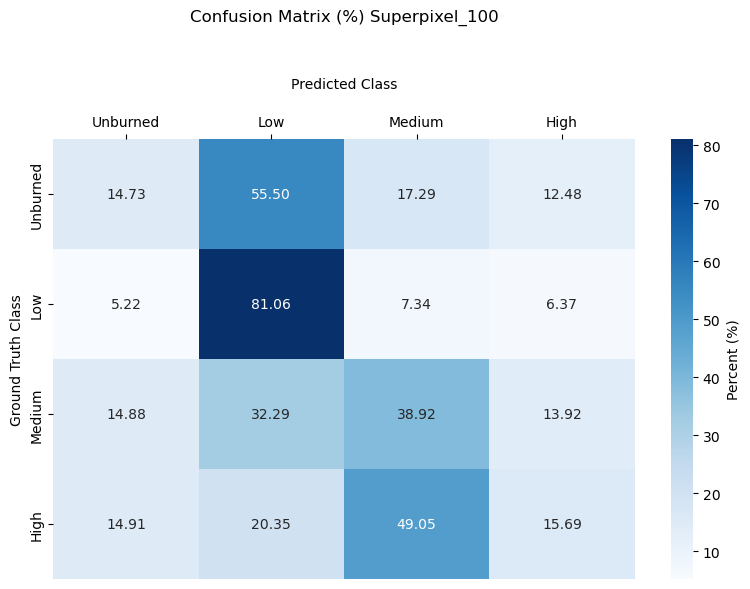


Overall Accuracy: 68.80%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.16      0.15      0.15     30436
         Low       0.87      0.81      0.84    285740
      Medium       0.37      0.39      0.38     46049
        High       0.05      0.16      0.07      9109

    accuracy                           0.69    371334
   macro avg       0.36      0.38      0.36    371334
weighted avg       0.73      0.69      0.71    371334



In [9]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_superpixel_100.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_100", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  13.02%   56.83%   17.40%   12.76%
Class 1:   4.45%   81.45%    7.44%    6.66%
Class 2:  10.35%   34.86%   40.10%   14.68%
Class 3:   8.83%   24.48%   49.94%   16.75%


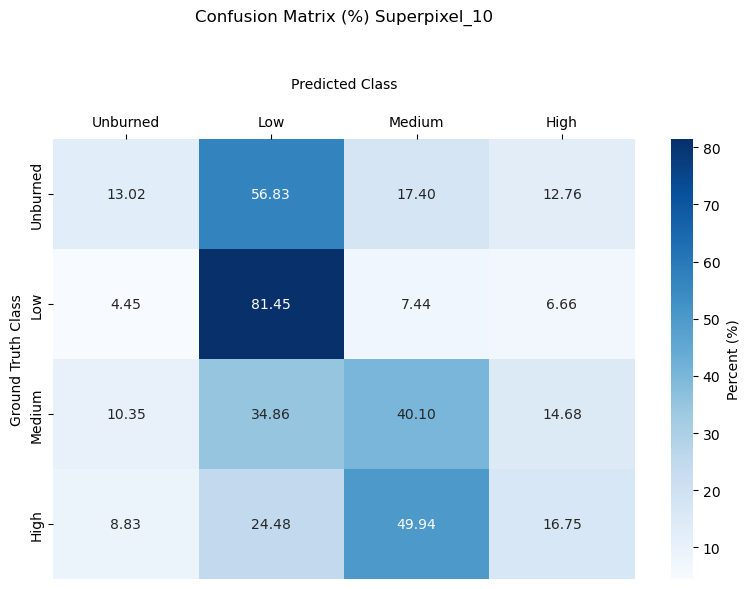


Overall Accuracy: 69.13%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.18      0.13      0.15     30436
         Low       0.87      0.81      0.84    285740
      Medium       0.37      0.40      0.39     46049
        High       0.05      0.17      0.08      9109

    accuracy                           0.69    371334
   macro avg       0.37      0.38      0.36    371334
weighted avg       0.73      0.69      0.71    371334



In [10]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_superpixel_10.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  19.59%   45.85%   14.98%   19.58%
Class 1:  11.44%   67.70%    6.47%   14.39%
Class 2:  11.61%   27.21%   43.19%   17.99%
Class 3:  12.76%   11.43%   46.19%   29.63%


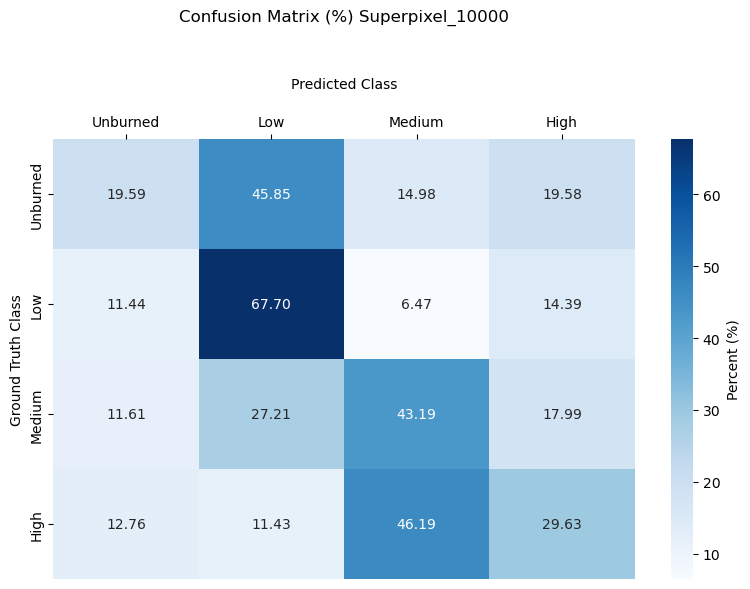


Overall Accuracy: 59.78%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.13      0.20      0.16     30436
         Low       0.88      0.68      0.76    285740
      Medium       0.42      0.43      0.43     46049
        High       0.05      0.30      0.08      9109

    accuracy                           0.60    371334
   macro avg       0.37      0.40      0.36    371334
weighted avg       0.74      0.60      0.66    371334



In [11]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_ interpolated_data_superpixel_10000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  22.12%   43.56%   16.16%   18.16%
Class 1:  10.27%   68.63%    7.69%   13.41%
Class 2:  13.53%   26.72%   42.95%   16.80%
Class 3:  14.50%   10.60%   50.20%   24.69%


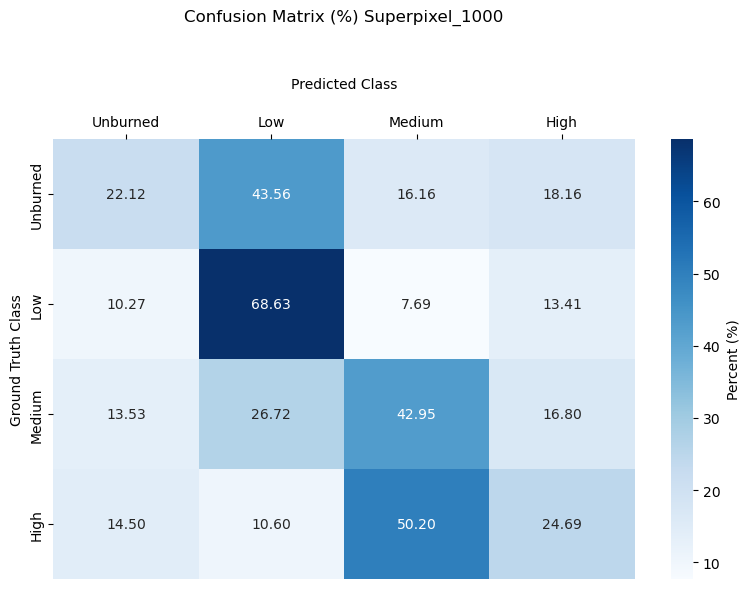


Overall Accuracy: 60.56%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.15      0.22      0.18     30436
         Low       0.88      0.69      0.77    285740
      Medium       0.39      0.43      0.41     46049
        High       0.04      0.25      0.07      9109

    accuracy                           0.61    371334
   macro avg       0.37      0.40      0.36    371334
weighted avg       0.74      0.61      0.66    371334



In [12]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_ interpolated_data_superpixel_1000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_1000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  25.95%   44.70%   11.31%   18.05%
Class 1:  13.96%   68.85%    5.96%   11.24%
Class 2:  17.12%   28.21%   30.25%   24.42%
Class 3:  19.34%   12.76%   33.49%   34.41%


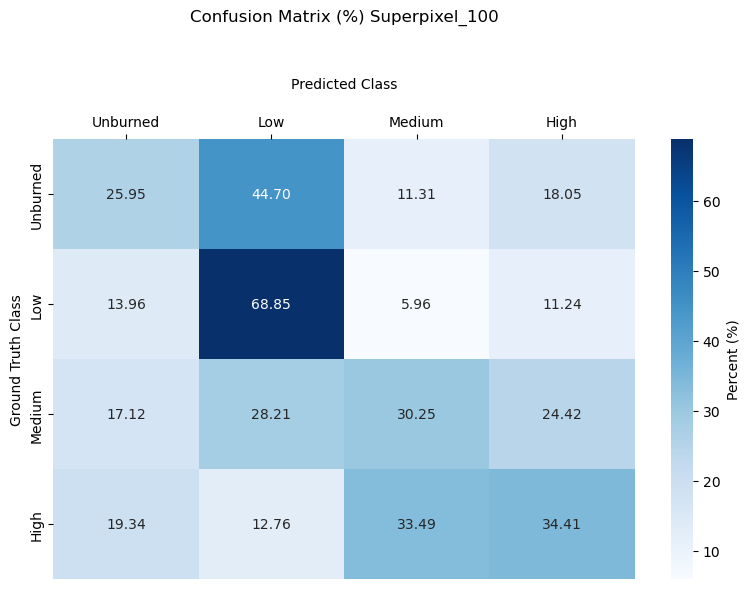


Overall Accuracy: 59.70%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.14      0.26      0.18     30436
         Low       0.88      0.69      0.77    285740
      Medium       0.37      0.30      0.33     46049
        High       0.06      0.34      0.10      9109

    accuracy                           0.60    371334
   macro avg       0.36      0.40      0.35    371334
weighted avg       0.73      0.60      0.65    371334



In [13]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different_Alpha1_ interpolated_data_superpixel_100.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_100", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  27.95%   42.92%    7.76%   21.38%
Class 1:  14.24%   68.12%    4.48%   13.16%
Class 2:  18.82%   26.83%   21.56%   32.79%
Class 3:  22.01%   11.13%   23.05%   43.80%


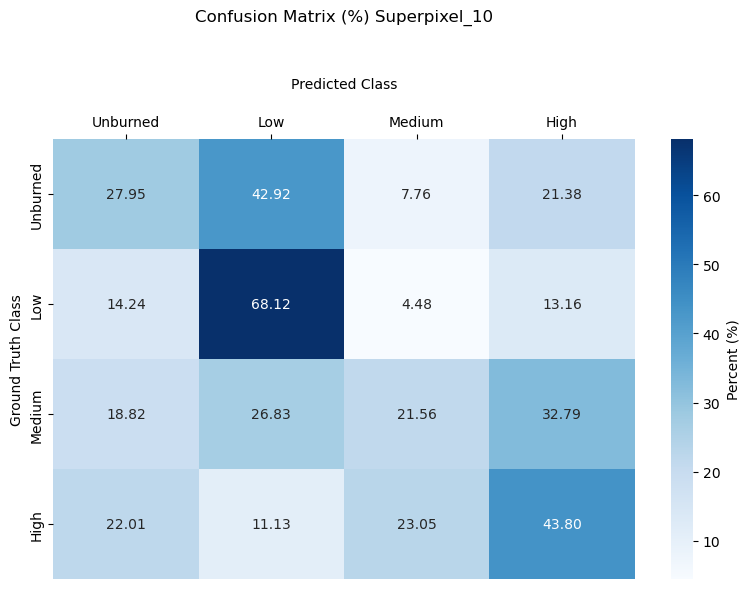


Overall Accuracy: 58.45%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.14      0.28      0.19     30436
         Low       0.88      0.68      0.77    285740
      Medium       0.37      0.22      0.27     46049
        High       0.06      0.44      0.11      9109

    accuracy                           0.58    371334
   macro avg       0.36      0.40      0.33    371334
weighted avg       0.74      0.58      0.64    371334



In [14]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_different Alpha 1_ interpolated_data_superpixel_10.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


Confusion Matrix (%):
Class 0:  26.37%   33.44%   11.53%   28.66%
Class 1:  11.34%   66.10%    6.25%   16.31%
Class 2:   8.56%   19.00%   43.62%   28.82%
Class 3:   0.94%   11.76%   48.87%   38.42%


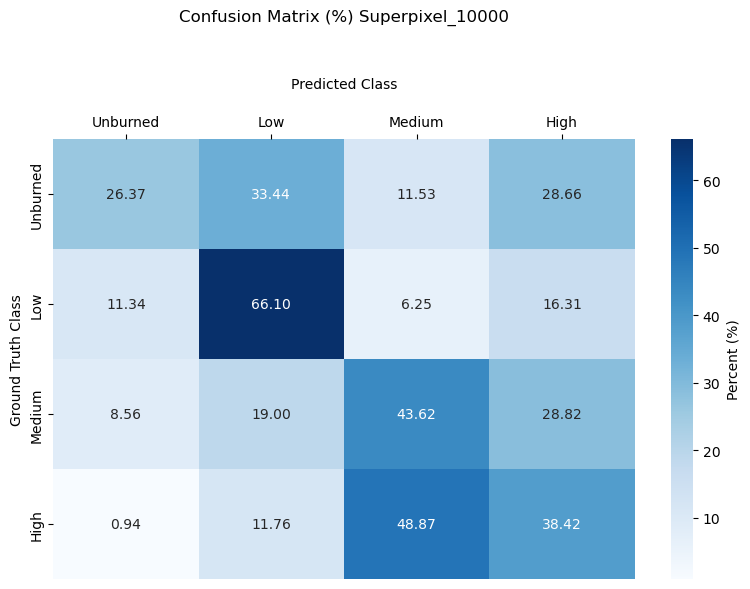


Overall Accuracy: 59.38%

Classification Report:
              precision    recall  f1-score   support

    Unburned       0.18      0.26      0.21     30436
         Low       0.90      0.66      0.76    285740
      Medium       0.44      0.44      0.44     46049
        High       0.05      0.38      0.09      9109

    accuracy                           0.59    371334
   macro avg       0.39      0.44      0.38    371334
weighted avg       0.77      0.59      0.66    371334



In [15]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_interpolated_data_superpixel_10000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_10000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


In [ ]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_interpolated_data_superpixel_1000.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_1000", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)


In [ ]:
# === File Paths ===
ground_truth_path = "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/ground_truth.png"
predicted_path =  "/shared/Wildfire/Bety_wildfire_project/Bety_data_test/Confusion_matrix_dataset/Burnseverity_classification_median_pre_alpha1_median_post_alpha1_interpolated_data_superpixel_100.png"

# === Load Ground Truth and Predicted Images ===
gt_img = Image.open(ground_truth_path).convert("RGB")
pred_img = Image.open(predicted_path).convert("RGB")
pred_img = pred_img.resize(gt_img.size, Image.NEAREST)

# === Convert to Arrays ===
gt_array = np.array(gt_img)
pred_array = np.array(pred_img)

# === New Mapping: RGB → Class Index for Raster ===
color_to_class = {
    (3, 98, 1): 0,         # Unburned
    (128, 250, 206): 1,    # Low
    (254, 250, 7): 2,      # Medium
    (252, 2, 0): 3         # High
}

# === Function: Map RGB to Class ID Using Nearest Color ===
def rgb_to_class(pixel, color_map):
    distances = {cls: np.linalg.norm(np.array(pixel) - np.array(rgb)) for rgb, cls in color_map.items()}
    return min(distances, key=distances.get)

# === Convert to Class Index Rasters ===
gt_raster = np.apply_along_axis(rgb_to_class, 2, gt_array, color_map=color_to_class)
pred_raster = np.apply_along_axis(rgb_to_class, 2, pred_array, color_map=color_to_class)

# === Flatten for Evaluation ===
gt_labels = gt_raster.flatten()
pred_labels = pred_raster.flatten()

# === Compute Confusion Matrix ===
conf_mat = confusion_matrix(gt_labels, pred_labels)

# === Normalize to Percentages ===
conf_mat_percent = conf_mat.astype(np.float64)
conf_mat_percent = conf_mat_percent / conf_mat_percent.sum(axis=1, keepdims=True) * 100

# === Print Normalized Confusion Matrix ===
print("Confusion Matrix (%):")
for i, row in enumerate(conf_mat_percent):
    print(f"Class {i}: " + "  ".join(f"{val:6.2f}%" for val in row))

# === Plot Heatmap ===
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_mat_percent, annot=True, fmt=".2f", cmap="Blues",
                 xticklabels=["Unburned", "Low", "Medium", "High"],
                 yticklabels=["Unburned", "Low", "Medium", "High"],
                 cbar_kws={"label": "Percent (%)"})
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xlabel("Predicted Class", labelpad=20)
plt.ylabel("Ground Truth Class")
plt.title("Confusion Matrix (%) Superpixel_100", pad=40)
plt.tight_layout()
plt.show()

# === Compute and Print Accuracy ===
accuracy = accuracy_score(gt_labels, pred_labels)
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# === Classification Report ===
class_names = ["Unburned", "Low", "Medium", "High"]
report = classification_report(gt_labels, pred_labels, target_names=class_names, digits=2)
print("\nClassification Report:")
print(report)
